In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [3]:
img_size = (128, 128)
batch_size = 32

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

In [5]:
train_data = train_datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 1612 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


In [6]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Regularization to avoid overfitting
    layers.Dense(1, activation='sigmoid')
])

C:\Users\sreej\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit((train_data), epochs=20, validation_data=(val_data))

C:\Users\sreej\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - accuracy: 0.6844 - loss: 0.8184 - val_accuracy: 0.9204 - val_loss: 0.2667
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 35s 677ms/step - accuracy: 0.8924 - loss: 0.2630 - val_accuracy: 0.9104 - val_loss: 0.2879
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 669ms/step - accuracy: 0.9216 - loss: 0.2268 - val_accuracy: 0.9030 - val_loss: 0.2902
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 35s 691ms/step - accuracy: 0.9278 - loss: 0.1913 - val_accuracy: 0.9328 - val_loss: 0.2223
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 660ms/step - accuracy: 0.9148 - loss: 0.2146 - val_accuracy: 0.9229 - val_loss: 0.2063
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 666ms/step - accuracy: 0.9450 - loss: 0.1658 - val_accuracy: 0.9080 - val_loss: 0.1960
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 628ms/step - accuracy: 0.9413 - loss: 0.1600 - val_accuracy: 0.9129 - val_loss: 0.2192
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 661ms/step - accuracy: 0.9404 - loss: 0.1702 - val_accu

In [17]:
print(f"Training data shape: {train_data.samples}")
print(f"Test data shape: {val_data.samples}")

Training data shape: 1612
Test data shape: 402


In [10]:
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - accuracy: 0.9143 - loss: 0.1959
Validation Accuracy: 93.28%


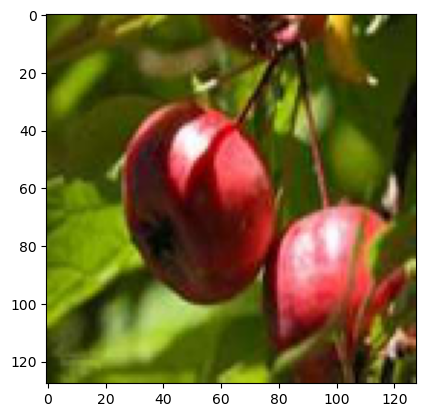

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: Apple


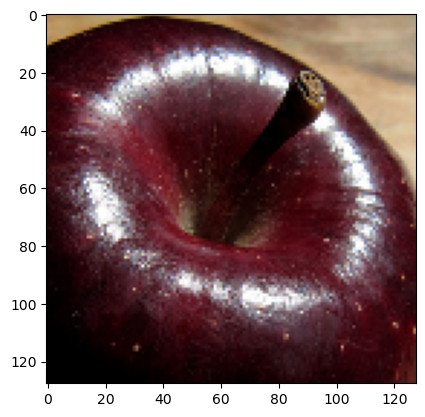

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: Apple


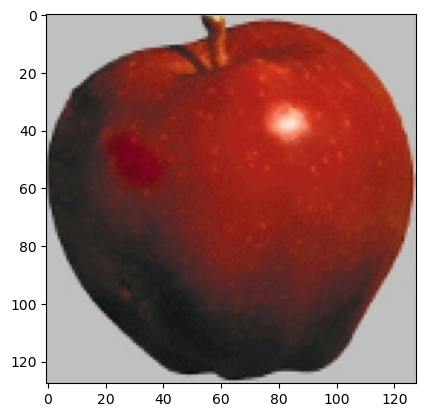

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class: Apple


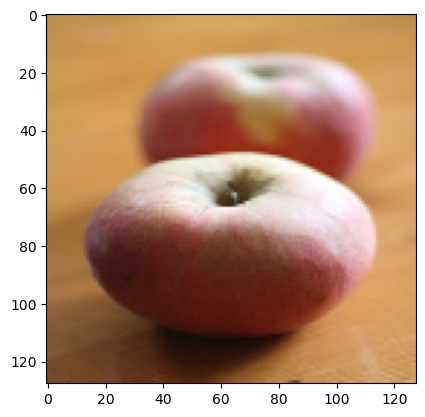

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted class: Apple


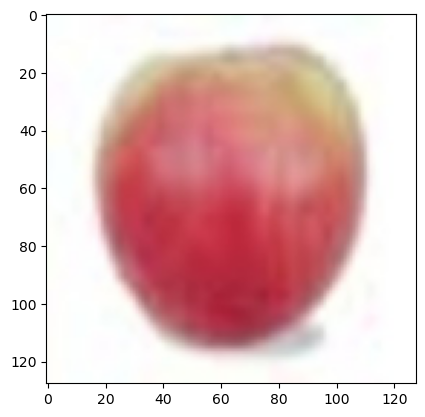

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: Apple


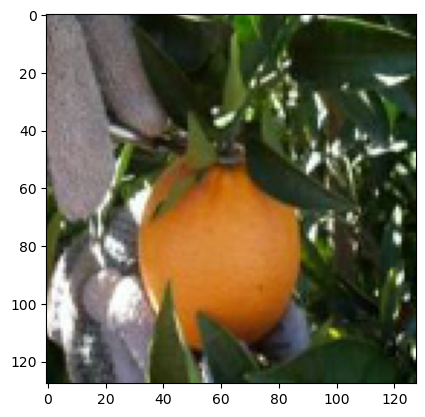

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted class: Orange


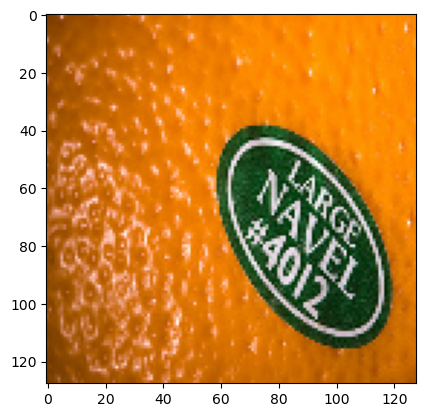

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Orange


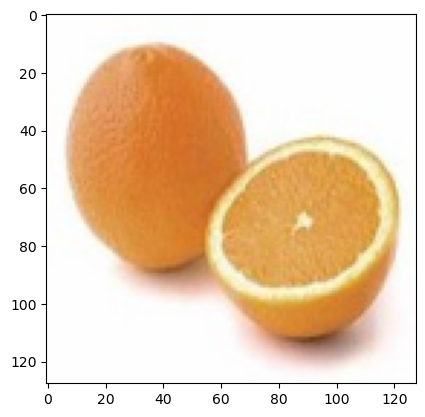

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class: Orange


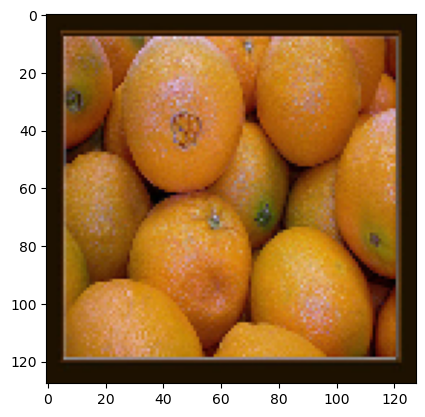

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted class: Orange


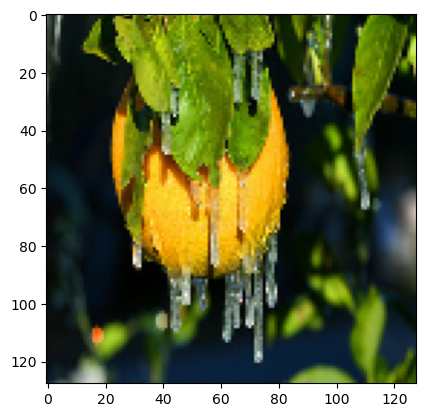

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted class: Orange


In [27]:
test_images = ['dataset/n07740461_1803.jpg','dataset/n07740461_14729.jpg','dataset/n07740461_12402.jpg','dataset/n07740461_11999.jpg','dataset/n07740461_9082.jpg','dataset/n07749192_3168.jpg','dataset/n07749192_2652.jpg','dataset/n07749192_2459.jpg','dataset/n07749192_1462.jpg','dataset/n07749192_12765.jpg']

for img_path in test_images:
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Display test image
    plt.imshow(img)
    plt.show()
    
    # Make prediction
    prediction = model.predict(img_array)
    class_name = "Apple" if prediction < 0.5 else "Orange"
    print(f"Predicted class: {class_name}")